# DATA CLEANING

In [18]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
from mpl_toolkits import mplot3d

In [20]:
# creating a dataframe to read the raw data file using pandas
df= pd.read_csv("crop production data.csv")


In [21]:
#cloumns names in the dataset
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [22]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [23]:
# checking datatype of all columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [24]:
#creating a new column named as "date"
df["Date"] = pd.to_datetime(df["Crop_Year"], format='%Y')

In [25]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Date
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2000-01-01
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01


In [26]:
#All unique state names
unique_State_Name = df["State_Name"].unique()
print(unique_State_Name)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [27]:
unique_Date = df["Date"].unique()
print(unique_Date)

['2000-01-01T00:00:00.000000000' '2001-01-01T00:00:00.000000000'
 '2002-01-01T00:00:00.000000000' '2003-01-01T00:00:00.000000000'
 '2004-01-01T00:00:00.000000000' '2005-01-01T00:00:00.000000000'
 '2006-01-01T00:00:00.000000000' '2010-01-01T00:00:00.000000000'
 '1997-01-01T00:00:00.000000000' '1998-01-01T00:00:00.000000000'
 '1999-01-01T00:00:00.000000000' '2007-01-01T00:00:00.000000000'
 '2008-01-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2011-01-01T00:00:00.000000000' '2012-01-01T00:00:00.000000000'
 '2013-01-01T00:00:00.000000000' '2014-01-01T00:00:00.000000000'
 '2015-01-01T00:00:00.000000000']


In [28]:
df["Season"] = df["Season"].str.strip()
unique_Season = df["Season"].unique()
print(unique_Season)

['Kharif' 'Whole Year' 'Autumn' 'Rabi' 'Summer' 'Winter']


In [32]:
#categorising 6 seasons into 4 major season
df["Season"] = df["Season"].apply (lambda x : "Rabi" if x == "winter" else x )
df["Season"] = df["Season"].apply (lambda x : "Rabi" if x == "Autumn" else x )
df["Season"] = df["Season"].apply (lambda x : "zaid" if x == "summer" else x )
print(df["Season"].unique())

['Kharif' 'Whole Year' 'Rabi' 'Zaid']


In [33]:
#unique crop names
df["Crop"] = df["Crop"].str.strip()
Unique_Crop = df["Crop"].unique()
print(Unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'
 

In [34]:
#correcting spelling of crops 
df["Crop"] = df["Crop"].apply( lambda x : "Seasum" if x == "Sesamum" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Pomegranate" if x == "Pome Granet" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Sunhemp" if x == "Sannhamp" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Raddish" if x == "Redish" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Soybean" if x == "Soyabean" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Snake Gourd" if x == "Snak Guard" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Pumpkin" if x == "Pump Kin" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Paddy" if x == "Rice" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Blackgram" if x == "Urad" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Lentil" if x == "Masoor" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Jute & mesta" if x == "Jute" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Jute & mesta" if x == "Mesta" else  x )
df["Crop"] = df["Crop"].apply( lambda x : "Cotton(lint)" if x == "Kapas" else  x )

Unique_Crop = df["Crop"].unique()
print(Unique_Crop)

['Arecanut' 'Other Kharif pulses' 'Paddy' 'Banana' 'Cashewnut' 'Coconut'
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Blackgram' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Lentil' 'Seasum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soybean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Jute & mesta' 'Cowpea(Lobia)'
 'Lemon' 'Pomegranate' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sunhemp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Peas & beans (Pulses)' 'Pineapple' 'Barley' 'Khesari'
 'Guar seed' 'Moth' 'Other Cereals & M

In [35]:
#categorising crops into crop categorize
def category_name(name):
    Cereals = ['Wheat','Maize','Bajra','Paddy', 'Jowar', 'Korra','Ragi','Small millets','Samai', 'Varagu','Barley','Khesari','Other Cereals & Millets','Total foodgrain','Jobster']
    Pulses = ['Pulses total','Other  Rabi pulses','Other Kharif pulses','Moong(Green Gram)','Blackgram','Lentil','Arhar/Tur','Horse-gram','Gram','other misc. pulses','Other rabi pulses','Other fibres','Cowpea(Lobia)','Peas & beans (Pulses)','Moth','Bean','Rajmash Kholar','Ricebean (nagadal)']
    Vegetables = ['Beans & Mutter(Vegetable)','Lemon','Sweet potato','Tapioca','Onion','Potato','Bhindi','Brinjal','Cucumber','Other Vegetables','Tomato','Cabbage','Peas  (vegetable)','Bottle Gourd','Turnip','Carrot','Raddish','Bitter Gourd','Drum Stick','Jack Fruit','Snake Gourd','Pumpkin','Cauliflower','Colocosia','Ash Gourd','Beet Root','Lab-Lab','Ribed Guard','Yam','Perilla']
    Fruits = ['Sapota','Banana','Citrus Fruit','Grapes','Mango','Orange','Other Fresh Fruits','Papaya','Pome Fruit','Pomegranate','Pineapple','Other Citrus Fruit','Water Melon','Apple','Peach','Pear','Plums','Litchi','Ber']
    Oilseeds = ['other oilseeds','Groundnut','Sunflower','Castor seed','Safflower','Linseed','Seasum','Rapeseed &Mustard','Niger seed','Oilseeds total','Sunhemp','Soybean']
    Condiments = ['Dry ginger','Black pepper','Dry chillies','Turmeric','Coriander','Garlic','Ginger','Cond-spcs other','Cardamom','Arcanut (Processed)','Atcanut (Raw)','Arecanut']
    Dryfruits = ['Cashewnut','Cashewnut Processed','Cashewnut Raw','Other Dry Fruit']
    Plantation = ['Coconut','Sugarcane','Cotton(lint)','Tobacco','Jute & mesta','Guar seed','Rubber','Tea','Coffee','other fibres']
    if name in Cereals:
        return 'Cereal'
    elif name in Pulses:
        return 'Pulses'
    elif name in Vegetables:
        return 'Vegetable'
    elif name in Fruits:
        return 'Fruit'
    elif name in Oilseeds:
        return 'Oilseed'
    elif name in Condiments:
        return 'Condiment'
    elif name in Dryfruits:
        return 'Dryfruit'
    elif name in Plantation:
        return 'Plantation'
    else:
        return 'None'
    
df["Category"] = df["Crop"].apply(category_name)
print(df["Category"].unique())

['Condiment' 'Pulses' 'Cereal' 'Fruit' 'Dryfruit' 'Plantation' 'Vegetable'
 'Oilseed']


In [36]:
#categorizing indian states into regions
def category(name):
    east_india = ['West Bengal', 'Tripura', 'Arunachal Pradesh', 'Assam', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim','Odisha']
    west_india = ['Maharashtra', 'Gujarat', 'Dadra and Nagar Haveli', 'Goa', 'Rajasthan']
    north_india = ['Bihar', 'Chandigarh', 'Chhattisgarh', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand', 'Madhya Pradesh', 'Punjab', 'Uttar Pradesh', 'Uttarakhand']
    south_india = ['Tamil Nadu', 'Telangana ', 'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry']
    
    if name in east_india:
        return 'East India'
    elif name in west_india:
        return 'West India'
    elif name in north_india:
        return 'North India'
    elif name in south_india:
        return 'South India'
    else:
        return 'None'
    
df["Region"] = df["State_Name"].apply(category)
print(df["Region"].unique())

['South India' 'East India' 'North India' 'West India']


In [41]:
ny_df = df.loc[df['Region'] == 'None']
ny_df["State_Name"].unique()

array([], dtype=object)

In [38]:
df.columns = ['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area(hectare)',
       'Production(tonnes)', 'Date', 'Category', 'Region']

In [39]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region'],
      dtype='object')

In [40]:
#creating new column named "productivity" & "total production"
df["Productivity"] = df["Production(tonnes)"] / df["Area(hectare)"]
df["Total Production"] = df["Production(tonnes)"] * df["Area(hectare)"]

In [42]:
df.columns



Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

In [43]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area(hectare),Production(tonnes),Date,Category,Region,Productivity,Total Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,2000-01-01,Condiment,South India,1.594896,2508000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,2000-01-01,Pulses,South India,0.500000,2.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Paddy,102.0,321.0,2000-01-01,Cereal,South India,3.147059,32742.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,2000-01-01,Fruit,South India,3.642045,112816.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,2000-01-01,Dryfruit,South India,0.229167,118800.0


In [44]:
#dropping null values
df = df.dropna(axis=0)

In [45]:
#dropping all the rows of less area
df = df.drop(df[df['Area(hectare)'] == 1].index)
df = df.drop(df[df['Area(hectare)'] == 2].index)
df = df.drop(df[df['Area(hectare)'] == 3].index)
df = df.drop(df[df['Area(hectare)'] == 4].index)
df = df.drop(df[df['Area(hectare)'] == 5].index)
df = df.drop(df[df['Area(hectare)'] == 6].index)
df = df.drop(df[df['Area(hectare)'] == 7].index)
df = df.drop(df[df['Area(hectare)'] == 10].index)

In [46]:
#dropping all the rows which have less production
df = df.drop(df[df['Production(tonnes)'] == 1].index)
df = df.drop(df[df['Production(tonnes)'] == 0].index)
df = df.drop(df[df['Production(tonnes)'] == 2].index)
df = df.drop(df[df['Production(tonnes)'] == 3].index)
df = df.drop(df[df['Production(tonnes)'] == 4].index)
df = df.drop(df[df['Production(tonnes)'] == 5].index)
df = df.drop(df[df['Production(tonnes)'] == 6].index)
df = df.drop(df[df['Production(tonnes)'] == 10].index)

In [47]:
df.to_csv("Cleaned.csv", index = False)

In [48]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area(hectare)', 'Production(tonnes)', 'Date', 'Category', 'Region',
       'Productivity', 'Total Production'],
      dtype='object')

In [49]:
#removing outliers
Q1 = df["Total Production"].quantile(0.40)
Q3 = df["Total Production"].quantile(0.60)
IQR = Q3 - Q1

df = df[(df["Total Production"] >= Q1 - 1.5*IQR) & (df["Total Production"] <= Q3 + 1.5*IQR)]

In [50]:
Q1 = df["Productivity"].quantile(0.40)
Q3 = df["Productivity"].quantile(0.60)
IQR = Q3 - Q1

df = df[(df["Productivity"] >= Q1 - 1.5*IQR) & (df["Productivity"] <= Q3 + 1.5*IQR)]

(array([76741.,  7248.,  3958.,  2710.,  2058.,  1754.,  1335.,  1186.,
         1125.,   919.]),
 array([8.00000000e-03, 1.00686001e+06, 2.01372001e+06, 3.02058001e+06,
        4.02744000e+06, 5.03430000e+06, 6.04116000e+06, 7.04802000e+06,
        8.05488000e+06, 9.06174000e+06, 1.00686000e+07]),
 <BarContainer object of 10 artists>)

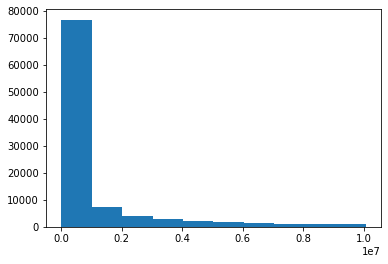

In [51]:
plt.hist(df["Total Production"])



(array([11984., 15434., 16307., 13256., 12632., 11263.,  6145.,  4620.,
         4457.,  2936.]),
 array([0.13772455, 0.29021349, 0.44270244, 0.59519138, 0.74768032,
        0.90016927, 1.05265821, 1.20514715, 1.3576361 , 1.51012504,
        1.66261398]),
 <BarContainer object of 10 artists>)

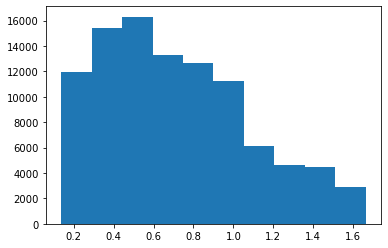

In [52]:
plt.hist(df["Productivity"])

In [53]:
df.to_csv("CleanedIQR.csv", index = False)

In [54]:
Q1 = df["Area(hectare)"].quantile(0.40)
Q3 = df["Area(hectare)"].quantile(0.60)
IQR = Q3 - Q1

df = df[(df["Area(hectare)"] >= Q1 - 1.5*IQR) & (df["Area(hectare)"] <= Q3 + 1.5*IQR)]

(array([27911., 12570.,  8176.,  5733.,  4528.,  3889.,  3174.,  3209.,
         2795.,  2301.]),
 array([1.00000e-01, 1.12790e+02, 2.25480e+02, 3.38170e+02, 4.50860e+02,
        5.63550e+02, 6.76240e+02, 7.88930e+02, 9.01620e+02, 1.01431e+03,
        1.12700e+03]),
 <BarContainer object of 10 artists>)

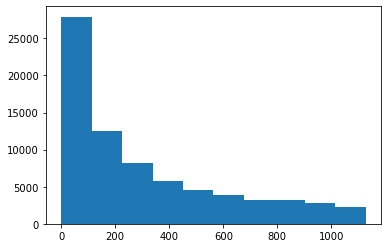

In [55]:
plt.hist(df["Area(hectare)"])



In [56]:
df.to_csv("CleanedIQR.csv", index = False)